
¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Brayan, cuando hacemos análisis de datos es muy útil escribir una introducción al proyecto donde se especifiquen claramente los objetivos y se explique el propósito del mismo. Es esencial hacer esto para establecer las bases del proyecto y aclarar lo que buscamos alcanzar. Con la introducción, queda de manera clarar el análisis que desarrollaremos en el proyecto y cómo lo pretendemos abordar.</div>

# Descripcion del proyecto

Estamos trabajando para Zuber, una nueva empresa de viajes compartidos que se esta lanzando en Chicago. Nos encargaron encontrar patrones en la informacion disponible. Buscamos comprender las preferencias de los usuarios y si algun factor externo como el clima influeye en estos.

Para esto se nos dio acceso a una base de datos y para complementar se busco informacion relevante en una pagina web

Objetivo:
-Analizar a los competidores
-Buscar patrones o preferencias de los usuarios 
-Verificar si el mal clima influye en la duracion de los viajes
-Buscar zonas de gran 

## Preparacion de la informacion

In [1]:
import pandas as pd
import numpy as np
import math as mt
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
df_company_trip = pd.read_csv('/datasets/project_sql_result_01.csv')
df_location_trip = pd.read_csv('/datasets/project_sql_result_04.csv')
df_weather_condition_trip = pd.read_csv('/datasets/project_sql_result_07.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [3]:
df_company_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
print(df_company_trip.head(10))

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


In [5]:
df_company_trip['company_name'] = df_company_trip['company_name'].str.lower()
print(df_company_trip.head())

                      company_name  trips_amount
0                        flash cab         19558
1        taxi affiliation services         11422
2                medallion leasing         10367
3                       yellow cab          9888
4  taxi affiliation service yellow          9299


El dataframe df_company_trip contiene los nombres de las empresas de transporte y la cantidad de viajes de los dias 15 y 16 de noviembre del 2017.

El dataframe contiene 2 columnas las cuales son non-null

Los tipos de datos corresponden a su descripcion es decir object para los nombre e int para la cantidad

El dataframe contiene todos los registros

In [6]:
df_location_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
print(df_location_trip.head(10))

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [8]:
df_location_trip['average_trips'] = df_location_trip['average_trips'].round()
df_location_trip['average_trips'] = df_location_trip['average_trips'].astype(int)
df_location_trip['dropoff_location_name'] = df_location_trip['dropoff_location_name'].str.lower()
print(df_location_trip.head())


  dropoff_location_name  average_trips
0                  loop          10727
1           river north           9524
2         streeterville           6665
3             west loop           5164
4                o'hare           2547


In [9]:
df_location_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


El dataframe df_location_trip contiene informacion de los barrios de chicago y promedio de viajes que finalizaron en noviembre de 2017

El dataframe tiene 2 columnas non-null

El tipo de dato para average_trips es float lo cual se cambiara a int ya que no puede haber fraccion de un viaje

EL dataframe no cuenta con datos nulos

In [10]:
df_weather_condition_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [11]:
print(df_weather_condition_trip.head(10))

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
5  2017-11-11 04:00:00               Good            1320.0
6  2017-11-04 16:00:00                Bad            2969.0
7  2017-11-18 11:00:00               Good            2280.0
8  2017-11-11 14:00:00               Good            2460.0
9  2017-11-11 12:00:00               Good            2040.0


In [12]:
df_weather_condition_trip['start_ts'] = pd.to_datetime(df_weather_condition_trip['start_ts'],format='%Y-%m-%d %H:%M:%S')
df_weather_condition_trip.info()
                                            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


El dataframe contiene la informacion sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. 

El dataframe tien 3 columnas non-null

La fecha esta definida como object la cual se cambio a datetime en caso de requerir de un analisis posteriormente

El dataframe no cuenta con registros nulos

## Tratar valores nulos

In [13]:
print(df_company_trip.isna().sum())

company_name    0
trips_amount    0
dtype: int64


In [14]:
print(df_location_trip.isna().sum())

dropoff_location_name    0
average_trips            0
dtype: int64


In [15]:
print(df_weather_condition_trip.isna().sum())

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


Como se puede apreciar y mas que nada para verificar los 3 dataframe no cuentan con datos nulos

## Tratar duplicados

In [16]:
print(df_company_trip.duplicated().sum())
print(df_company_trip['company_name'] .isna().sum())

0
0


In [17]:
print(df_location_trip.duplicated().sum())
print(df_location_trip['dropoff_location_name'] .isna().sum())

0
0


In [18]:
print(df_weather_condition_trip.duplicated().sum())

197


In [19]:
print(df_weather_condition_trip[df_weather_condition_trip.duplicated()])

                start_ts weather_conditions  duration_seconds
62   2017-11-11 06:00:00               Good            1260.0
74   2017-11-11 08:00:00               Good            1380.0
76   2017-11-04 09:00:00               Good            1380.0
117  2017-11-11 07:00:00               Good            1380.0
119  2017-11-04 14:00:00               Good            3300.0
...                  ...                ...               ...
1054 2017-11-11 07:00:00               Good            1380.0
1058 2017-11-25 12:00:00               Good            1440.0
1062 2017-11-11 06:00:00               Good            1500.0
1065 2017-11-11 13:00:00               Good            2100.0
1066 2017-11-11 08:00:00               Good            1380.0

[197 rows x 3 columns]


Los dataframe df_company_trip y df_location_trip no cuentan con duplicados

El dataframe df_weather_condition_trip arrojo duplicados pero al comprobar estos se puede ver que son debido al formato de fecha ya que tanto el año y el mes son iguales en estos registros duplicado pero la hora y la columna duration=seconds son diferentes

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el análisis de registros duplicados!.</div>

## Analisis de datos


### 10 barrios principales

In [20]:
best_dropoff_location = df_location_trip.sort_values(by='average_trips', ascending=False).head(10)
print(best_dropoff_location)
print(best_dropoff_location.median())
print(best_dropoff_location.mean())

  dropoff_location_name  average_trips
0                  loop          10727
1           river north           9524
2         streeterville           6665
3             west loop           5164
4                o'hare           2547
5             lake view           2421
6            grant park           2069
7         museum campus           1510
8            gold coast           1364
9    sheffield & depaul           1260
average_trips    2484.0
dtype: float64
average_trips    4325.1
dtype: float64


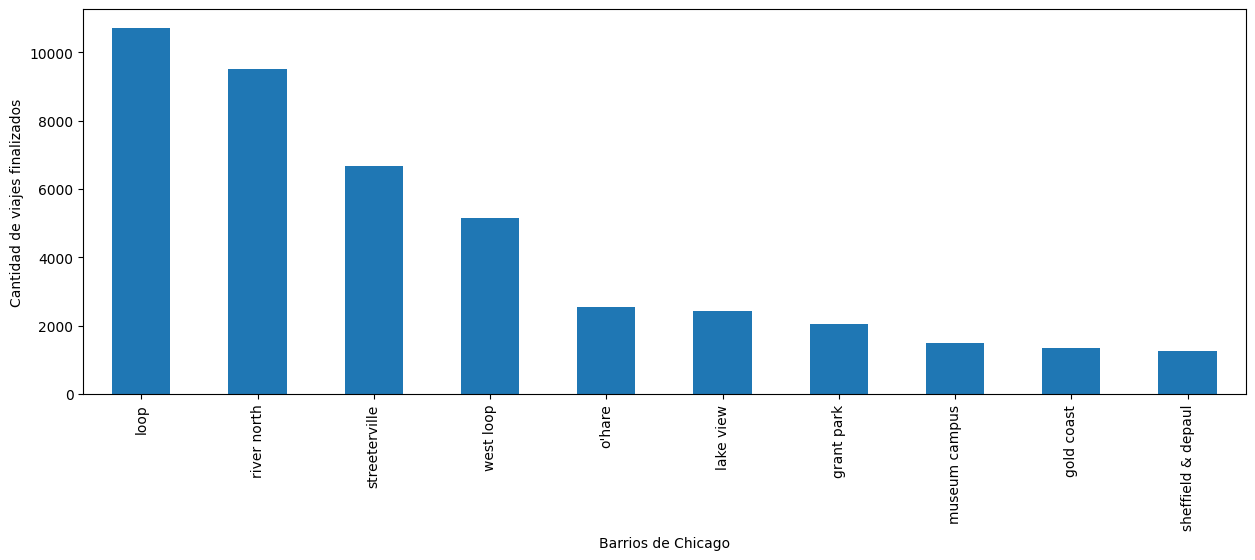

In [21]:

best_dropoff_location.plot(kind='bar', x='dropoff_location_name',y='average_trips',figsize=(15,5),legend=False)

plt.xlabel('Barrios de Chicago')
plt.ylabel('Cantidad de viajes finalizados')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis y lo complementaste con una gráfica.
    </div>

El top de cantidad de viajes va desde los 1260 hasta el maximo de 10727

De los datos presentes la gran mayoria de las personas reside en el barrio Loop

La menor cantidad de personas reside en sheffield & depaul



### Empresas y sus viajes

In [22]:
print(df_company_trip.max())
print(df_company_trip.min())
print(df_company_trip['trips_amount'].value_counts().sort_index())
print('la media es:',df_company_trip['trips_amount'].mean())

company_name    yellow cab
trips_amount         19558
dtype: object
company_name    0118 - 42111 godfrey s. awir
trips_amount                               2
dtype: object
2        1
3        1
5        1
7        2
8        1
11       1
12       1
13       1
14       3
15       2
16       1
20       1
21       2
25       1
27       1
29       3
31       1
33       2
36       1
37       1
39       1
127      1
146      1
147      1
210      1
230      1
250      1
310      1
402      1
428      1
978      1
1014     1
1259     1
1296     1
1404     1
1486     1
1607     1
1775     1
1955     1
2070     1
2216     1
2235     1
3175     1
3355     1
4383     1
5015     1
5953     1
7455     1
7701     1
8448     1
9181     1
9299     1
9888     1
10367    1
11422    1
19558    1
Name: trips_amount, dtype: int64
                        company_name  trips_amount
0                          flash cab         19558
1          taxi affiliation services         11422
2                  medalli

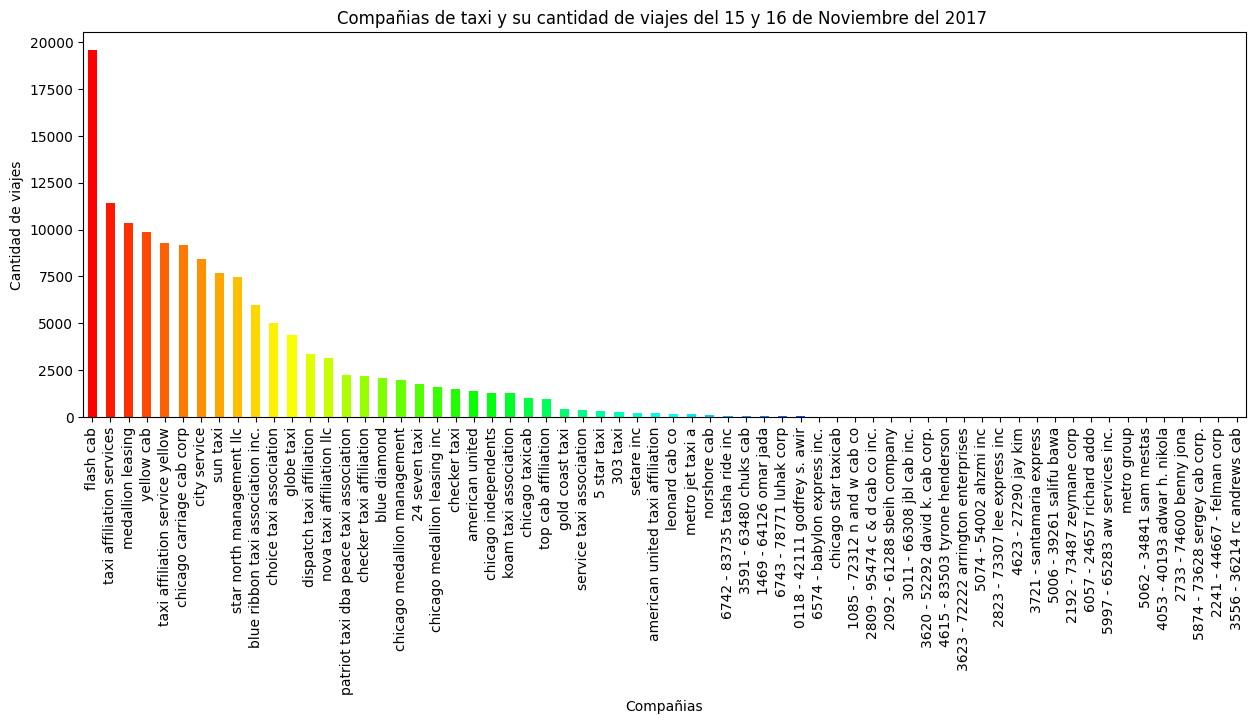

In [56]:
colores = plt.cm.get_cmap('hsv', len(df_company_trip))

df_company_trip.plot(kind='bar', x='company_name',y='trips_amount',legend=False,figsize=(15,5),color=[colores(i) for i in range(len(df_company_trip)) ])
plt.title('Compañias de taxi y su cantidad de viajes del 15 y 16 de Noviembre del 2017 ')
plt.xlabel('Compañias')
plt.ylabel('Cantidad de viajes')
plt.show()

In [52]:
best_company_trip=df_company_trip.sort_values(by='trips_amount',ascending=False).head(10)
print(best_company_trip)

                        company_name  trips_amount
0                          flash cab         19558
1          taxi affiliation services         11422
2                  medallion leasing         10367
3                         yellow cab          9888
4    taxi affiliation service yellow          9299
5          chicago carriage cab corp          9181
6                       city service          8448
7                           sun taxi          7701
8          star north management llc          7455
9  blue ribbon taxi association inc.          5953


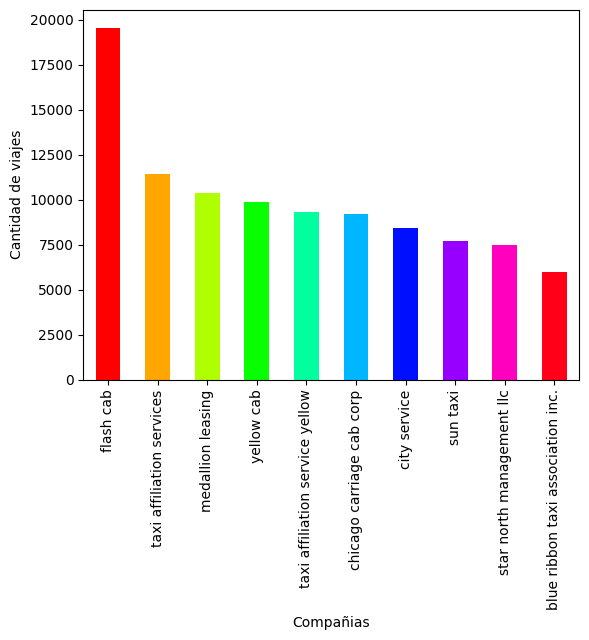

In [54]:


colores_best = plt.cm.get_cmap('hsv', len(best_company_trip))

best_company_trip.plot(kind='bar', x='company_name',y='trips_amount',legend=False, color=[colores_best(i) for i in range(len(best_company_trip))])
plt.title('Top 10 compañias de taxi ')
plt.xlabel('Compañias')
plt.ylabel('Cantidad de viajes')
plt.show()

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el desarrollo de la gráfica para visualizar los resultados. Solamente dado que al cliente le interesa el top 10 de las principales empresas con número de viajes, te recomiendo complementar este análisis con una gráfica solamente mostrando el top 10.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

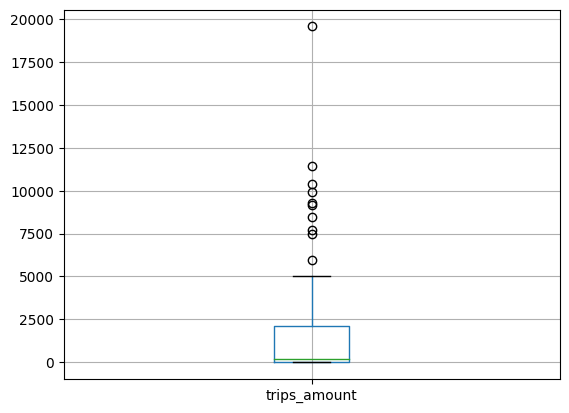

In [24]:
df_company_trip.boxplot()
plt.show()

La cantidad minima de viajes fue de 2 por la empresa 0118 - 42111 godfrey s. awir y la mayor canitdad de viejas fue de 19558 por la empresa flash cab

Como se menciono la mejor empresa de taxi fue flash cab 19558 viajes

En el top 10 de empresas con mas viajes se puede ver que la cantidad del puesto 10 es de 5953 viajes de blue ribbon taxi association inc por lo que la diferencia es considerable

Para saber el porque de estas preferencias se debera buscar informacion con respecto hace cuanto tiempo funciona cada empresa cantidad de taxis a su disposicion etc.

Con respecto a la dispesion que se puede ver el grafico de caja una gran mayoria de datos esta bajo los 2500 viajes ya que la mediana se situa en los 2145.484375

Las viajes de la empresas mayores a la media se encuentran bastante dispersos

Los outliner son de empresas que tienen sobre 5000 viajes

## Hipotesis
La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

Del requerimiento anterior podemos realizar la hipotesis nula y alternativa

La hipotesis nula la podemos definir como La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos

La hipotesis alternativa seria el mismo enunciado La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos


In [25]:
good_weather = df_weather_condition_trip[df_weather_condition_trip['weather_conditions']=='Good']['duration_seconds']
bad_weather = df_weather_condition_trip[df_weather_condition_trip['weather_conditions']=='Bad']['duration_seconds']

print(good_weather.describe())

varianza_good = np.var(good_weather)
print(varianza_good)

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64
575732.9308497686


In [26]:
print(bad_weather.describe())

varianza_bad = np.var(bad_weather)
print(varianza_bad)

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64
517403.56330246915


In [27]:

alpha = 0.05
result = st.ttest_ind(good_weather,bad_weather,equal_var=False)
print('valor p:',result.pvalue)

if result.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('no podemos rechazar la hipotesis')

valor p: 6.738994326108734e-12
Rechazamos la hipotesis nula


In [28]:
result_levene = st.levene(good_weather,bad_weather)
print('valor p:',result_levene.pvalue)

if result_levene.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('no podemos rechazar la hipotesis')

valor p: 0.5332038671974493
no podemos rechazar la hipotesis


Como los resultados del ttes es un rechazo de la hipotesis nula y el resultado del test de levene es de no podemos rechazar la hipotesis nula quiere decir que las varianzas de los viajes con climas good y bad correspondiente a storm y rain respectivamente son casi iguales con 53% 

Por los resultados anteriores se puede concluir que el clima no es la mayor influencia a la hora de realizar los viajes

Puede que otros factores como la hora, el dia o las zonas de destino(horarios de empresas,locales, etc) tengan un mayor impacto en la realizacion de viajes

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Realizaste de manera perfecta la prueba de hipótesis.  Además, lo complementaste con la prueba de levene
</div>

## Conclusiones generales

Por lo datos obtenidos Zuber tiene que fijarse en las empresas top en cuanto a viajes realizados como es flash cab, taxi affiliation services o medallion leasing que tienen mas de 10000 viajes, para ver que factorer especificos los hacen que los prefieran los usuarios

El destino final de la mayoria de viajes es en el barrio Loop por lo que planificar recorridos para esta ubicacion es una buena opcion

Como se comprobo en la hipotesis el clima no suele afectar la duracion de los viajes entre 2 puntos por lo que no se tiene que tener una gran preocupacion con respecto a este


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:


* Realizar un análisis de duplicados
    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos.    
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
*  Profundizar en los resultados intermedios y en la conclusión final.
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>